# Zomato Dataset - Exploratory Data Analysis (EDA)

 **Table of Contents**
1. Introduction
2. Data Loading and Overview
3. Data Cleaning
4. Exploratory Data Analysis
5. Key Insights and Conclusion


  EDA with Zomato Dataset

 **Key Highlights**:
- Cleaned and analyzed data from Zomato's global restaurant dataset.
- Explored trends in cuisines, pricing, and ratings across various countries.
- Generated visually appealing and informative insights.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
#The %matplotlib inline is used to display matplotlib plots inline, directly within the notebook, 
# rather than in a separate window. This makes it easier to visualize data and plots as you work through your analysis.

In [2]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.head(2)
#The encoding parameter specifies the character encoding used to read the file.
#It is essential for correctly interpreting the file's text content, especially 
# for files containing non-ASCII characters (e.g., accented letters or special symbols).

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [3]:
# Checking the columns in the dataset
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
# understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe() # This will give the statistical summary of the dataset like mean, median, mode, standard deviation etc.

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Major steps in EDA 
1. Missing values
2. Explore about the numerical variable
3. Explore about the categorical variable
4. Finding relationship between variables


In [6]:
null_values = df.isnull().sum() # Checking the null values of the dataset

In [7]:
# getting the coloumns having null values
[features for features in df.columns if df[features].isnull().sum()>0]  # using list comprehension

['Cuisines']

C:\Users\Kalpesh Pathade\AppData\Local\Temp\ipykernel_11788\1378711448.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_values.index, y=null_values.values, palette="viridis")


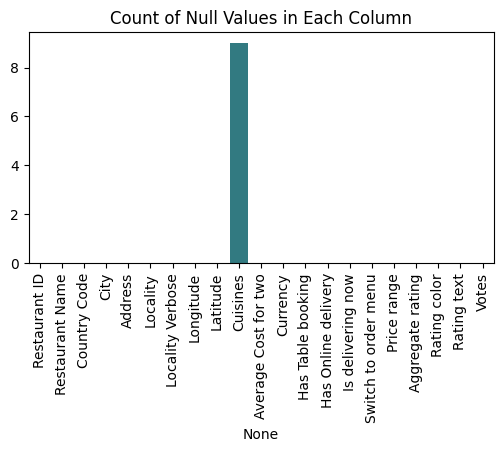

In [ ]:
# plotting using heatmap
# plt.figure(figsize=(7,3))
# sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="viridis")
# plt.show()
# cbar - parameter determines whether to draw a color bar (a side bar that shows the mapping of data values to colors). If cbar is set to True, a color bar will be displayed. If set to False, the color bar will be omitted.
# cmap - parameter specifies the colormap to be used for the heatmap. A colormap is a range of colors used to map data values to colors in the heatmap. The cmap parameter can take a predefined colormap name (like "viridis", "plasma", "inferno", etc.), a colormap object, or a list of colors.
# Plotting the count of null values using a bar plot

plt.figure(figsize=(6,3))
sns.barplot(x=null_values.index, y=null_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Count of Null Values in Each Column")
plt.show()

In [ ]:
# Reading the Country-Code dataset
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
# combining the two datasets using merge
final_df = pd.merge(df, df_country, on="Country Code",how="left") # left join


In [11]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [12]:
final_df.Country.value_counts() # with respect to a country how many records are there in the dataset

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [13]:
country_names = final_df.Country.value_counts().index # getting country name with respect to particular record
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [14]:
country_values = final_df.Country.value_counts().values # getting the count of the country
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

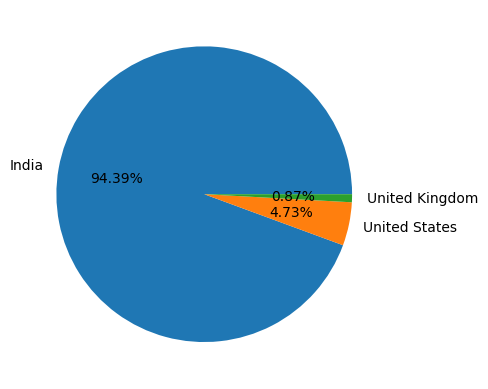

In [48]:
# Pie chart - top three countries that uses zomato
plt.pie(country_values[:3], labels = country_names[:3], autopct='%1.2f%%')
plt.show()

Observation : Zomato maximum  records or transactions are from India,
after that USA and then United Kingdom

In [16]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [17]:
ratings = final_df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index(name="Rating count")
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


 Observations 
 - When rating is between 4.5 to 4.9 ------> Excellent
 - When rating is between 4.0 to 4.4 ------> Very Good
 - When rating is between 3.5 to 3.9 ------> Good
 - When rating is between 3.0 to 3.4 ------> Average
 - When rating is between 2.5 to 2.9 ------> Poor
 - When rating is between 2.0 to 2.4 ------> Not Good


In [18]:
ratings.head(3)

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2


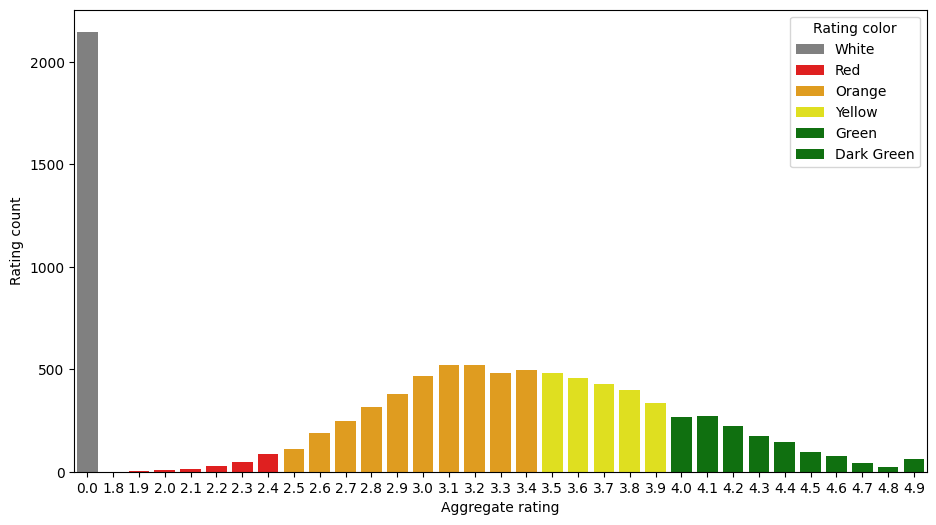

In [51]:
plt.figure(figsize=(11,6))
sns.barplot(x="Aggregate rating",y="Rating count",data=ratings, hue="Rating color", palette=['grey','red','orange','yellow','green','green'])
plt.show()

Observations
1. Not rated count is very high
2. Maximum number of rating are between 2.5 to 3.4 

C:\Users\Kalpesh Pathade\AppData\Local\Temp\ipykernel_11788\4054887891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating color",data=ratings,palette= ['grey','red','orange','yellow','green','green'])


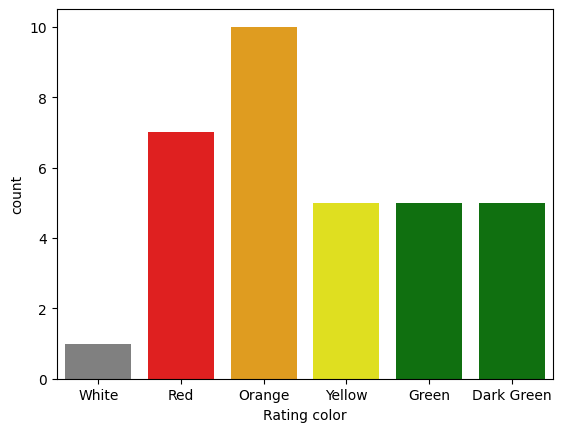

In [20]:
# count plot
# frequency of the rating color
sns.countplot(x="Rating color",data=ratings,palette= ['grey','red','orange','yellow','green','green'])
plt.show()

In [21]:
# finding the country names that has given 0 ratings
final_df.groupby(["Aggregate rating","Country"]).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [22]:
# finding out which currency is used by which country ?
final_df.groupby(["Country","Currency"]).size().head(15).reset_index(name = "No of Transactions")


,Country,Currency,No of Transactions
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [23]:
# finding countries having online delivery option
final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [24]:
final_df.groupby(["Country","Has Online delivery"]).size().reset_index(name="No of Times")

,Country,Has Online delivery,No of Times
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


Observations:
1.Online deliveries are available in Indaina and UAE

In [25]:
final_df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [26]:
# creating a pie char for cities distribution 

city_names = final_df.City.value_counts().index # getting the city names
city_names

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

In [27]:
city_counts = final_df.City.value_counts().values # getting the count of the city
city_counts


array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

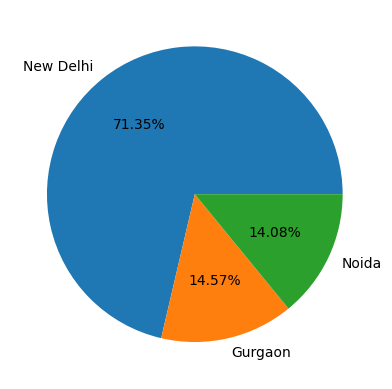

In [28]:
# Pie chart - top three cities that uses zomato
plt.pie(city_counts[:3], labels = city_names[:3], autopct='%1.2f%%')
plt.show()

In [29]:
# finding the top 10 cuisines that are available in the zomato
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [30]:
final_df.Cuisines.value_counts().head(10).reset_index(name= "No of Orders") # finding the occurence of the cuisines

,Cuisines,No of Orders
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


In [31]:
top_cuisines = final_df.Cuisines.value_counts().index[:5] # getting the top 5 cuisines
top_cuisines

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai'],
      dtype='object', name='Cuisines')

In [32]:
no_of_cuisines = final_df.Cuisines.value_counts().values[:5] # getting the count of the cuisines
no_of_cuisines

array([936, 511, 354, 354, 334], dtype=int64)

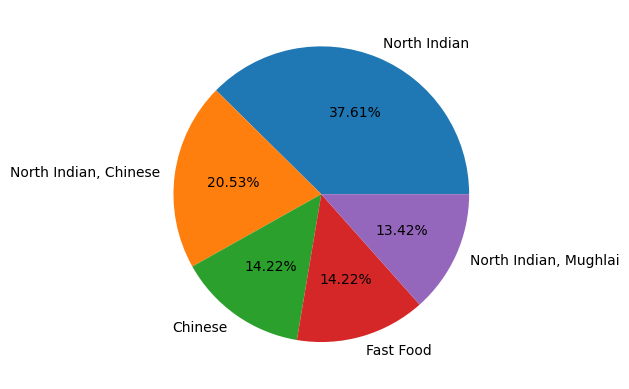

In [33]:
# plotting the top 5 cuisines
plt.pie(no_of_cuisines, labels= top_cuisines, autopct='%1.2f%%')
plt.show()

<Axes: xlabel='Cuisines'>

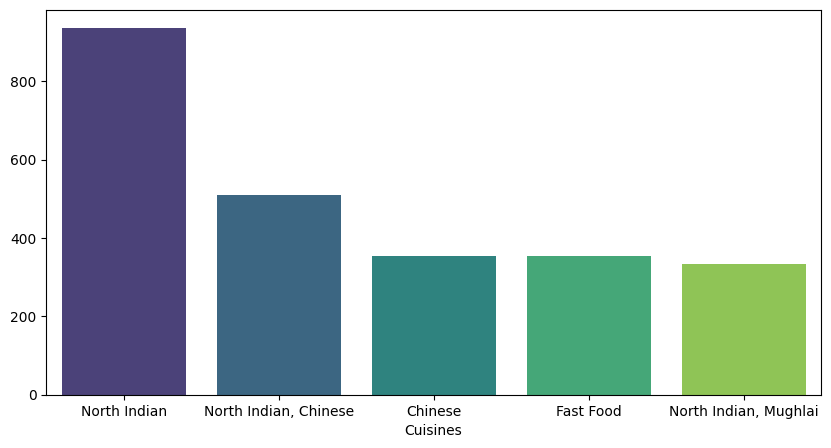

In [34]:
# Plotting using barplot
plt.figure(figsize=(10,5))
sns.barplot(x=top_cuisines, y=no_of_cuisines,hue=top_cuisines, palette='viridis')

